# Introduction

 <div style = "color: White; display: fill;
              border-radius: 5px;
              background-color: #20BEFF;
              font-size: 100%;
              font-family: Verdana">
This dataset is about customer has taken credit and bought items which is purpose. Using this dataset will perform statistics and probabality analysis.

# Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization like pie graph
import seaborn as sns #visualization like scatterplot 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current sessio

/kaggle/input/credit-data/german_credit_data.csv


# Loading Dataset

In [2]:
#Reading the Dataset
credit=pd.read_csv('/kaggle/input/credit-data/german_credit_data.csv')
#copying the dataset
data=credit.copy()

In [3]:
# dropping the column - Unnmaned:0 as it doesn't have much use.
data.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
# first three rows of data dataset
data.head(3)

,Age,Gender,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education


# Exploring the Dataset

In [5]:
#Summary of Dataset
def summary(df):
    brief=pd.DataFrame(index=df.columns)
    brief['dtypes']=df.dtypes
    brief['count']=df.count()
    brief['#unique']=df.nunique()
    brief['#missing']=df.isna().sum()
    brief['missing%']=df.isna().sum()/len(df)*100
    brief=pd.concat([brief , df.describe().T.drop('count',axis=1)],axis=1)
    return brief

In [6]:
summary(data).style.background_gradient(cmap='YlGnBu')

,dtypes,count,#unique,#missing,missing%,mean,std,min,25%,50%,75%,max
Age,int64,1000,53,0,0.000000,35.546000,11.375469,19.000000,27.000000,33.000000,42.000000,75.000000
Gender,object,1000,2,0,0.000000,nan,nan,nan,nan,nan,nan,nan
Job,int64,1000,4,0,0.000000,1.904000,0.653614,0.000000,2.000000,2.000000,2.000000,3.000000
Housing,object,1000,3,0,0.000000,nan,nan,nan,nan,nan,nan,nan
Saving accounts,object,817,4,183,18.300000,nan,nan,nan,nan,nan,nan,nan
Checking account,object,606,3,394,39.400000,nan,nan,nan,nan,nan,nan,nan
Credit_amount,int64,1000,921,0,0.000000,3271.258000,2822.736876,250.000000,1365.500000,2319.500000,3972.250000,18424.000000
Duration,int64,1000,33,0,0.000000,20.903000,12.058814,4.000000,12.000000,18.000000,24.000000,72.000000
Purpose,object,1000,8,0,0.000000,nan,nan,nan,nan,nan,nan,nan


#### Insights:
* Saving accounts & Checking account having null values.

# Handling NULL Values

In [7]:
data.dropna(inplace=True)

In [8]:
data.isna().sum()

Age                 0
Gender              0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit_amount       0
Duration            0
Purpose             0
dtype: int64

# Feature Encoding

In [9]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['Gender','Housing','Saving accounts','Checking account','Purpose']
for col in cols:
    data[col]=le.fit_transform(data[col])
data

,Age,Gender,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration,Purpose
1,22,0,2,1,0,1,5951,48,5
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1
7,35,1,3,2,0,1,6948,36,1
9,28,1,3,1,0,1,5234,30,1
...,...,...,...,...,...,...,...,...,...
989,48,1,1,1,0,1,1743,24,5
993,30,1,3,1,0,0,3959,36,4
996,40,1,3,1,0,0,3857,30,1
998,23,1,2,0,0,0,1845,45,5


# Visualization

### Density Plot
* Use figure and axes method
* Create a figure and store it in variable fig. Set figure size as (8,6).
* Create an axes ax using add_subplot
* Plot desnity plot (kde plot) on column 'Duration'
* Add line to represent mean value of duration. Set colour to 'Green'.Set label to 'Mean'
* Add line to represent median value of duration. Set colour to 'Brown'.Set label to 'Median'
* Add line to represent Standard deviation value of duration. Set colour to 'Red'.Set label to 'Std'
* Add line to represent Iqr value of duration. Set colour to 'Yellow'.Set label to 'Iqr'
* set title as 'Plot Mean/Median/Std/lqr'
* plot legend
* Store the plot in variable plot1

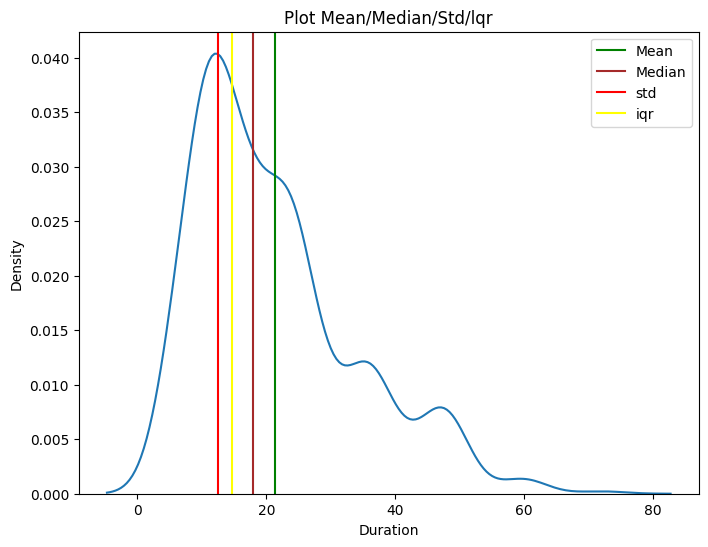

In [10]:
import statistics as st
import scipy
fig = plt.figure(figsize=(8,6))
ax= fig.add_subplot()
sns.kdeplot(data=data,x='Duration')

# Calucate Statistics
mean_val=data['Duration'].mean()
median_val=data['Duration'].median()
std_val=data['Duration'].std()
q75,q25=np.percentile(data['Duration'],[75,25])
iqr=q75-q25

#Add lines for mean,median,std and iqr
plt.axvline(mean_val,color='green',label='Mean')
plt.axvline(median_val,color='brown',label='Median')
plt.axvline(std_val,color='red',label='std')
plt.axvline(iqr,color='yellow',label='iqr')

#Add title
plt.title('Plot Mean/Median/Std/lqr')

# add Legend
plt.legend()

plot1=plt

### Heat map